In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os


Données : 

In [ ]:
X_test = pd.read_csv("./X_test_update.csv")  
X_train = pd.read_csv("./X_train_update.csv")  
Y_train = pd.read_csv("./Y_train_CVw08PX.csv")  

Données images : 

In [ ]:
image_train_path = "./images/image_train"
image_test_path = "./images/image_test"

image_train_files = os.listdir(image_train_path)
image_test_files = os.listdir(image_test_path)

print(f"Nombre d'images dans image_train : {len(image_train_files)}")
print(f"Exemples : {image_train_files[:5]}")

print(f"Nombre d'images dans image_test : {len(image_test_files)}")
print(f"Exemples : {image_test_files[:5]}")


Nombre d'images dans image_train : 84916
Exemples : ['image_1174594490_product_2940640728.jpg', 'image_1172460449_product_185143847.jpg', 'image_1313553701_product_4199252811.jpg', 'image_1008107210_product_435919430.jpg', 'image_1190251689_product_2738644573.jpg']
Nombre d'images dans image_test : 13812
Exemples : ['image_1249606148_product_3820372371.jpg', 'image_892175909_product_138929604.jpg', 'image_1008472702_product_438303008.jpg', 'image_1245507747_product_3793029859.jpg', 'image_1299725079_product_4143441868.jpg']


In [ ]:
image_data = []
for filename in image_train_files:
    parts = filename.split("_")  # Séparer par "_"
    imageid = int(parts[1])  # Deuxième élément après "image"
    productid = int(parts[3].split(".")[0])  # Quatrième élément après "product"
    image_data.append((filename, imageid, productid))
        
df_images = pd.DataFrame(image_data, columns=["filename", "imageid", "productid"])

print(df_images.head())

                                  filename     imageid   productid
0  image_1174594490_product_2940640728.jpg  1174594490  2940640728
1   image_1172460449_product_185143847.jpg  1172460449   185143847
2  image_1313553701_product_4199252811.jpg  1313553701  4199252811
3   image_1008107210_product_435919430.jpg  1008107210   435919430
4  image_1190251689_product_2738644573.jpg  1190251689  2738644573


Exploration : 

In [ ]:
print(X_train.info())
print(X_test.info())
print(Y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   84916 non-null  int64 
 1   designation  84916 non-null  object
 2   description  55116 non-null  object
 3   productid    84916 non-null  int64 
 4   imageid      84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13812 entries, 0 to 13811
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   13812 non-null  int64 
 1   designation  13812 non-null  object
 2   description  8926 non-null   object
 3   productid    13812 non-null  int64 
 4   imageid      13812 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 539.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 2 

## 🔍 **Aperçu des données**  
Nous avons trois jeux de données :  
- `X_train` : 84 916 échantillons, 5 colonnes  
- `X_test` : 13 812 échantillons, 5 colonnes  
- `Y_train` : 84 916 échantillons, 2 colonnes (contient les labels `prdtypecode`)

#### 📌 **Colonnes :**
- `designation` : Nom du produit (objet)
- `description` : Description détaillée du produit (objet, contient des valeurs manquantes)
- `productid` et `imageid` : Identifiants numériques
- `prdtypecode` (dans `Y_train`) : Catégorie du produit (label cible)


In [ ]:
print(X_train.head())

   Unnamed: 0                                        designation  \
0           0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1           1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2           2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3           3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4           4                               La Guerre Des Tuques   

                                         description   productid     imageid  
0                                                NaN  3804725264  1263597046  
1                                                NaN   436067568  1008141237  
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978  
3                                                NaN    50418756   457047496  
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786  


Valeurs manquantes : 

In [8]:
print(X_train.isnull().sum())
print("____________________")
print(X_test.isnull().sum())
print("____________________")
print(Y_train.isnull().sum())


Unnamed: 0         0
designation        0
description    29800
productid          0
imageid            0
dtype: int64
____________________
Unnamed: 0        0
designation       0
description    4886
productid         0
imageid           0
dtype: int64
____________________
Unnamed: 0     0
prdtypecode    0
dtype: int64


In [9]:

# Statistiques descriptives
print(X_train.describe())

         Unnamed: 0     productid       imageid
count  84916.000000  8.491600e+04  8.491600e+04
mean   42457.500000  2.555468e+09  1.152691e+09
std    24513.282066  1.588656e+09  1.751427e+08
min        0.000000  1.839120e+05  6.728400e+04
25%    21228.750000  6.760519e+08  1.056269e+09
50%    42457.500000  3.190506e+09  1.213354e+09
75%    63686.250000  3.995599e+09  1.275646e+09
max    84915.000000  4.252012e+09  1.328824e+09


Compter les produits 'prdtypecode'

prdtypecode
2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
1280     4870
2403     4774
2280     4760
1920     4303
1160     3953
1320     3241
10       3116
2705     2761
1140     2671
2582     2589
40       2508
2585     2496
1302     2491
1281     2070
50       1681
2462     1421
2905      872
60        832
2220      824
1301      807
1940      803
1180      764
Name: count, dtype: int64


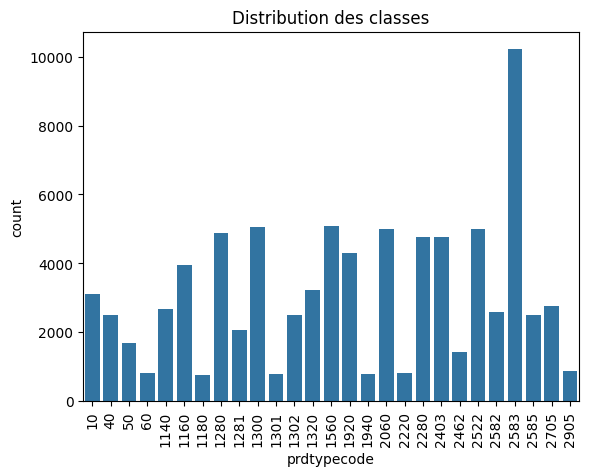

In [ ]:
print(Y_train['prdtypecode'].value_counts())

sns.countplot(x='prdtypecode', data=Y_train)
plt.title("Distribution des classes")
plt.xticks(rotation=90)
plt.show()


Longueurs des variables texte (description + designation)

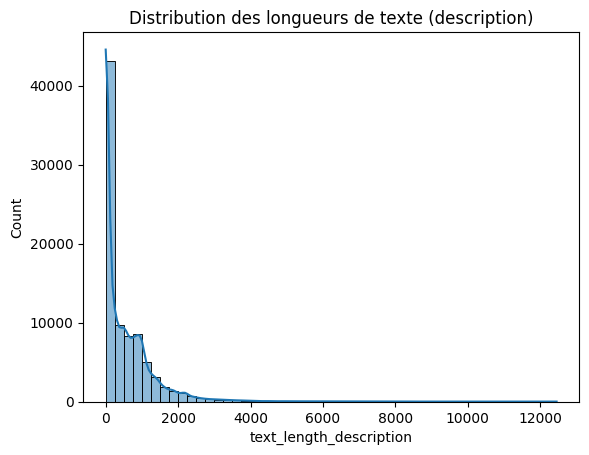

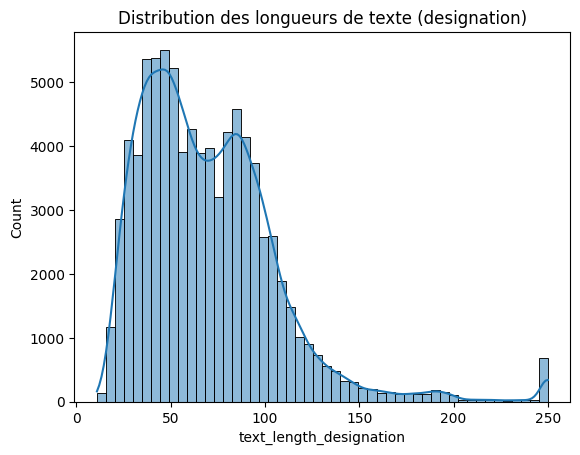

In [ ]:
X_train['description'] = X_train['description'].fillna('')
X_train['designation'] = X_train['designation'].fillna('')

X_train['text_length_description'] = X_train['description'].apply(len)
X_train['text_length_designation'] = X_train['designation'].apply(len)

sns.histplot(X_train['text_length_description'], bins=50, kde=True)
plt.title("Distribution des longueurs de texte (description)")
plt.show()

sns.histplot(X_train['text_length_designation'], bins=50, kde=True)
plt.title("Distribution des longueurs de texte (designation)")
plt.show()


Nuages de mots : 

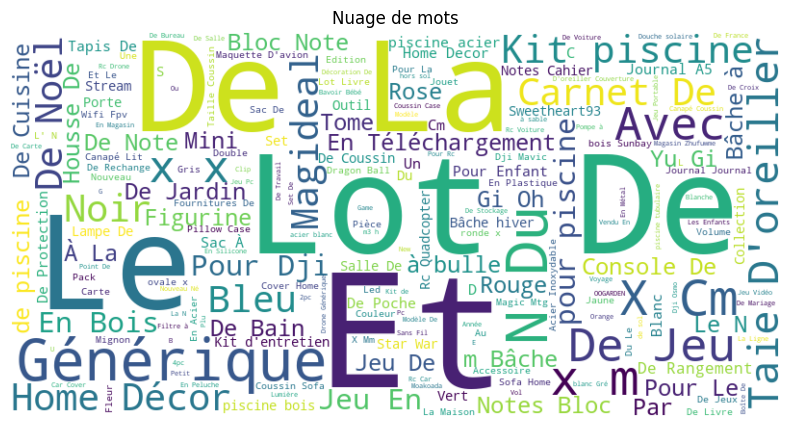

In [12]:
text = " ".join(X_train['designation'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots")
plt.show()
